In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange
import os,sys
from array import array
import time

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


## Lumi logo

In [3]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.4
lumiTextOffset   = 0.2

cmsTextSize      = 0.35
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "59.7 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_*1.20, posY_, extraText)      

    pad.Update()

## TDR style

In [4]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.11)
tdrStyle.SetPadBottomMargin(0.11)
tdrStyle.SetPadLeftMargin(0.11)
tdrStyle.SetPadRightMargin(0.11)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(1.1)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## Ratio plot

In [5]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.80)
    h3.SetMaximum(1.53)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(105)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(20)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(20)

    return h3

## Control Pad

In [6]:
# 0: WZG
# 1: WZG_emm
# 2: WZG_mee
# 3: WZG_eee
# 4: WZG_mmm

# 10: ttZ
# 11: ttZ_emm
# 12: ttZ_mee
# 13: ttZ_eee
# 14: ttZ_mmm

# 9: ZZ
# 5: ZZ_eemm
# 6: ZZ_mmee
# 7: ZZ_eeee
# 8: ZZ_mmmm     


branch = {
    "ZZ_mllz1":{
        "name":"ZZ_mllz1",
        "axis_name":"ZZ m_{l_{Z1}l_{Z2}} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
#     "ttZ_dileptonmass":{
#         "name":"ttZ_dileptonmass",
#         "axis_name":"m_{Z} [GeV]",
#         "xbins":10,
#         "xleft":70,
#         "xright":110,
#     },
#     "ttZ_trileptonmass":{
#         "name":"ttZ_trileptonmass",
#         "axis_name":"m_{WZ} [GeV]",
#         "xbins":10,
#         "xleft":100,
#         "xright":200,
#     },
    "MET":{
        "name":"MET",
        "axis_name":"MET [GeV]",
        "xbins":10,
        "xleft":0,
        "xright":100,
    },
    "nJets":{
        "name":"nJets",
        "axis_name":"nJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
    "nbJets":{
        "name":"nbJets",
        "axis_name":"nbJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
}

channel = 9
lumi = 59.7

### Add Hist

In [7]:
def AddHist(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_lepton_branches)
        init_branches.extend(gen_photon_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (branches.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (branches.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (branches.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & lep_gen_cut,:]
    
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))


## Add Data

In [8]:

filelist_data = [
    "/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018A.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018B.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018C.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018D.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018A.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018B.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018C.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018D.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018A.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018B.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018C.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018D.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018A.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018B.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018C.root"
    ,"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018D.root"
]

hist_data = {}

for branch_name in branch:
    hist_data_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_data_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_data_temp.SetYTitle(f'events / bin')
    hist_data_temp.Sumw2()
    hist_data[branch_name] = hist_data_temp
    
for file in filelist_data:
    AddHist(file, hist_data, 1, 0, 0, channel, branch)

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018A.root: 100%|██████████| 6/6 [00:00<00:00, 782.86it/s]


SumOfWeights for ZZ_mllz1:  6.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018A.root: 100%|██████████| 6/6 [00:00<00:00, 25731.93it/s]


SumOfWeights for MET:  6.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018A.root: 100%|██████████| 6/6 [00:00<00:00, 26772.15it/s]


SumOfWeights for nJets:  6.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018A.root: 100%|██████████| 6/6 [00:00<00:00, 29746.84it/s]


SumOfWeights for nbJets:  6.0
Time cost: 2.90

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018B.root: 100%|██████████| 5/5 [00:00<00:00, 14789.51it/s]


SumOfWeights for ZZ_mllz1:  11.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018B.root: 100%|██████████| 5/5 [00:00<00:00, 14553.45it/s]


SumOfWeights for MET:  11.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018B.root: 100%|██████████| 5/5 [00:00<00:00, 36095.56it/s]


SumOfWeights for nJets:  11.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018B.root: 100%|██████████| 5/5 [00:00<00:00, 29873.96it/s]


SumOfWeights for nbJets:  11.0
Time cost: 2.37

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018C.root: 100%|██████████| 1/1 [00:00<00:00, 3625.15it/s]


SumOfWeights for ZZ_mllz1:  12.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018C.root: 100%|██████████| 1/1 [00:00<00:00, 9845.78it/s]


SumOfWeights for MET:  12.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018C.root: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


SumOfWeights for nJets:  12.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018C.root: 100%|██████████| 1/1 [00:00<00:00, 9619.96it/s]


SumOfWeights for nbJets:  12.0
Time cost: 2.42

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018D.root: 100%|██████████| 6/6 [00:00<00:00, 27443.65it/s]


SumOfWeights for ZZ_mllz1:  18.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018D.root: 100%|██████████| 6/6 [00:00<00:00, 32939.56it/s]


SumOfWeights for MET:  18.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018D.root: 100%|██████████| 6/6 [00:00<00:00, 36846.01it/s]


SumOfWeights for nJets:  18.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/DoubleMuon_Run2018D.root: 100%|██████████| 6/6 [00:00<00:00, 41943.04it/s]


SumOfWeights for nbJets:  18.0
Time cost: 2.74

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018A.root: 100%|██████████| 53/53 [00:00<00:00, 122007.75it/s]


SumOfWeights for ZZ_mllz1:  71.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018A.root: 100%|██████████| 53/53 [00:00<00:00, 121408.03it/s]


SumOfWeights for MET:  71.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018A.root: 100%|██████████| 53/53 [00:00<00:00, 122208.97it/s]


SumOfWeights for nJets:  71.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018A.root: 100%|██████████| 53/53 [00:00<00:00, 115359.68it/s]


SumOfWeights for nbJets:  71.0
Time cost: 3.24

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018B.root: 100%|██████████| 27/27 [00:00<00:00, 83576.54it/s]


SumOfWeights for ZZ_mllz1:  98.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018B.root: 100%|██████████| 27/27 [00:00<00:00, 88473.60it/s]


SumOfWeights for MET:  98.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018B.root: 100%|██████████| 27/27 [00:00<00:00, 99164.81it/s]


SumOfWeights for nJets:  98.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018B.root: 100%|██████████| 27/27 [00:00<00:00, 94687.46it/s]


SumOfWeights for nbJets:  98.0
Time cost: 2.12

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018C.root: 100%|██████████| 16/16 [00:00<00:00, 39592.25it/s]


SumOfWeights for ZZ_mllz1:  114.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018C.root: 100%|██████████| 16/16 [00:00<00:00, 71697.50it/s]


SumOfWeights for MET:  114.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018C.root: 100%|██████████| 16/16 [00:00<00:00, 70715.35it/s]


SumOfWeights for nJets:  114.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018C.root: 100%|██████████| 16/16 [00:00<00:00, 70864.69it/s]


SumOfWeights for nbJets:  114.0
Time cost: 2.33

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018D.root: 100%|██████████| 132/132 [00:00<00:00, 131103.04it/s]


SumOfWeights for ZZ_mllz1:  246.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018D.root: 100%|██████████| 132/132 [00:00<00:00, 134348.00it/s]


SumOfWeights for MET:  244.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018D.root: 100%|██████████| 132/132 [00:00<00:00, 136737.00it/s]


SumOfWeights for nJets:  246.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/EGamma_Run2018D.root: 100%|██████████| 132/132 [00:00<00:00, 127363.27it/s]


SumOfWeights for nbJets:  246.0
Time cost: 3.23

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018A.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  246.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018A.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  244.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018A.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  246.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018A.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  246.0
Time cost: 2.84

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018B.root: 100%|██████████| 2/2 [00:00<00:00, 7139.24it/s]


SumOfWeights for ZZ_mllz1:  248.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018B.root: 100%|██████████| 2/2 [00:00<00:00, 12985.46it/s]


SumOfWeights for MET:  245.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018B.root: 100%|██████████| 2/2 [00:00<00:00, 7536.93it/s]


SumOfWeights for nJets:  248.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018B.root: 100%|██████████| 2/2 [00:00<00:00, 15534.46it/s]


SumOfWeights for nbJets:  248.0
Time cost: 2.33

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018C.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  248.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018C.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  245.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018C.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  248.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018C.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  248.0
Time cost: 2.20

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018D.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  248.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018D.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  245.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018D.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  248.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/MuonEG_Run2018D.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  248.0
Time cost: 2.32

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018A.root: 100%|██████████| 259/259 [00:00<00:00, 145288.85it/s]


SumOfWeights for ZZ_mllz1:  507.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018A.root: 100%|██████████| 259/259 [00:00<00:00, 143655.74it/s]


SumOfWeights for MET:  502.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018A.root: 100%|██████████| 259/259 [00:00<00:00, 138561.83it/s]


SumOfWeights for nJets:  505.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018A.root: 100%|██████████| 259/259 [00:00<00:00, 137405.10it/s]


SumOfWeights for nbJets:  507.0
Time cost: 3.02

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018B.root: 100%|██████████| 115/115 [00:00<00:00, 131107.63it/s]


SumOfWeights for ZZ_mllz1:  622.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018B.root: 100%|██████████| 115/115 [00:00<00:00, 129767.27it/s]


SumOfWeights for MET:  617.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018B.root: 100%|██████████| 115/115 [00:00<00:00, 133097.40it/s]


SumOfWeights for nJets:  620.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018B.root: 100%|██████████| 115/115 [00:00<00:00, 125349.52it/s]


SumOfWeights for nbJets:  622.0
Time cost: 2.50

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018C.root: 100%|██████████| 123/123 [00:00<00:00, 97689.72it/s]


SumOfWeights for ZZ_mllz1:  745.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018C.root: 100%|██████████| 123/123 [00:00<00:00, 99845.05it/s]


SumOfWeights for MET:  739.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018C.root: 100%|██████████| 123/123 [00:00<00:00, 99306.91it/s]


SumOfWeights for nJets:  743.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018C.root: 100%|██████████| 123/123 [00:00<00:00, 95785.26it/s]


SumOfWeights for nbJets:  745.0
Time cost: 2.44

is Data


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018D.root: 100%|██████████| 556/556 [00:00<00:00, 151195.09it/s]


SumOfWeights for ZZ_mllz1:  1300.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018D.root: 100%|██████████| 556/556 [00:00<00:00, 148338.72it/s]


SumOfWeights for MET:  1286.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018D.root: 100%|██████████| 556/556 [00:00<00:00, 139684.52it/s]


SumOfWeights for nJets:  1297.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/SingleMuon_Run2018D.root: 100%|██████████| 556/556 [00:00<00:00, 144282.19it/s]

SumOfWeights for nbJets:  1301.0
Time cost: 2.93



### Add MC

In [11]:
filelist_MC = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTGJets_2018.root", 
        "xsec":4.078,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTZToLLNuNu_2018.root", 
        "xsec":0.2432,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTWJetsToLNu_2018.root", 
        "xsec":0.2149,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/tZq_2018.root", 
        "xsec":0.07358,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWW_2018.root", 
        "xsec":0.2086,
        "color":7},
#   "WZ":
#        {"name":"WZ", 
#        "path":"/eos/user/s/sdeng/WZG_analysis/final_skim/2018/WZ_TuneCP5_13TeV-pythia8_2018_0000.root", 
#        "xsec":27.6,
#        "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZGToLLG_2018.root", 
        "xsec":55.48,
        "color":9},
    "ZZ":
        {"name":"ZZ",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZ_2018.root",
        "xsec":12.14,
        "color":12},
    "WZG":
        {"name":"WZG",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WZG_2018.root",
        "xsec":0.0384,
        "color":21},
   "WWZ":
        {"name":"WWZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWZ_2018.root", 
        "xsec":0.1707,
        "color":46},
   "ZZZ":
        {"name":"ZZZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZZ_2018.root", 
        "xsec":0.01476,
        "color":41},    
}

In [12]:
def SetHistStyle(hist, color):
    hist.SetMarkerStyle(20)
    hist.SetMarkerColor(color)
    hist.SetFillColor(color)
    hist.SetYTitle('events/bin')
    hist.SetStats(0)
    hist.Sumw2()
    
    
for file in filelist_MC:
    hist_MC = {}
    for branch_name in branch:
        hist_MC_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
        SetHistStyle(hist_MC_temp, filelist_MC[file]["color"])
        hist_MC_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
        hist_MC[branch_name] = hist_MC_temp
        
    AddHist(filelist_MC[file]["path"], hist_MC, 0, filelist_MC[file]["xsec"], lumi, channel, branch)
    filelist_MC[file]["hist"] = hist_MC

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTGJets_2018.root: 100%|██████████| 5/5 [00:00<00:00, 18001.30it/s]


SumOfWeights for ZZ_mllz1:  0.14657919108867645


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTGJets_2018.root: 100%|██████████| 5/5 [00:00<00:00, 23590.01it/s]


SumOfWeights for MET:  0.14657919108867645


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTGJets_2018.root: 100%|██████████| 5/5 [00:00<00:00, 22028.91it/s]


SumOfWeights for nJets:  0.2931583821773529


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTGJets_2018.root: 100%|██████████| 5/5 [00:00<00:00, 28493.91it/s]


SumOfWeights for nbJets:  0.14657919108867645
Time cost: 8.09

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTZToLLNuNu_2018.root: 100%|██████████| 8319/8319 [00:00<00:00, 67365.86it/s]


SumOfWeights for ZZ_mllz1:  9.028548210859299


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTZToLLNuNu_2018.root: 100%|██████████| 8319/8319 [00:00<00:00, 81663.43it/s]


SumOfWeights for MET:  5.258971072733402


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTZToLLNuNu_2018.root: 100%|██████████| 8319/8319 [00:00<00:00, 64488.87it/s]


SumOfWeights for nJets:  8.975379556417465


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTZToLLNuNu_2018.root: 100%|██████████| 8319/8319 [00:00<00:00, 81077.84it/s]


SumOfWeights for nbJets:  9.054317474365234
Time cost: 9.24

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTWJetsToLNu_2018.root: 100%|██████████| 23/23 [00:00<00:00, 48746.33it/s]


SumOfWeights for ZZ_mllz1:  0.047654356341809034


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTWJetsToLNu_2018.root: 100%|██████████| 23/23 [00:00<00:00, 60787.01it/s]


SumOfWeights for MET:  0.023827177472412586


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTWJetsToLNu_2018.root: 100%|██████████| 23/23 [00:00<00:00, 61406.11it/s]


SumOfWeights for nJets:  0.06195066403597593


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/TTWJetsToLNu_2018.root: 100%|██████████| 23/23 [00:00<00:00, 29719.34it/s]


SumOfWeights for nbJets:  0.06195066496729851
Time cost: 7.76

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/tZq_2018.root: 100%|██████████| 871/871 [00:00<00:00, 90736.64it/s]


SumOfWeights for ZZ_mllz1:  0.31613773154094815


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/tZq_2018.root: 100%|██████████| 871/871 [00:00<00:00, 56618.29it/s]


SumOfWeights for MET:  0.2399600411299616


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/tZq_2018.root: 100%|██████████| 871/871 [00:00<00:00, 50708.44it/s]


SumOfWeights for nJets:  0.31740759150125086


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/tZq_2018.root: 100%|██████████| 871/871 [00:00<00:00, 55020.31it/s]


SumOfWeights for nbJets:  0.31613776087760925
Time cost: 8.45

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWW_2018.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  0.0


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWW_2018.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  0.0


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWW_2018.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  0.0


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWW_2018.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  0.0
Time cost: 7.98

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZGToLLG_2018.root: 100%|██████████| 5/5 [00:00<00:00, 17105.64it/s]


SumOfWeights for ZZ_mllz1:  0.5493021607398987


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZGToLLG_2018.root: 100%|██████████| 5/5 [00:00<00:00, 31068.92it/s]


SumOfWeights for MET:  0.5493021458387375


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZGToLLG_2018.root: 100%|██████████| 5/5 [00:00<00:00, 28378.24it/s]


SumOfWeights for nJets:  0.5493021458387375


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZGToLLG_2018.root: 100%|██████████| 5/5 [00:00<00:00, 17036.17it/s]


SumOfWeights for nbJets:  0.5493021607398987
Time cost: 7.90

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZ_2018.root: 100%|██████████| 2124/2124 [00:00<00:00, 93069.46it/s]


SumOfWeights for ZZ_mllz1:  769.3176300525665


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZ_2018.root: 100%|██████████| 2124/2124 [00:00<00:00, 94370.84it/s]


SumOfWeights for MET:  766.7950403690338


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZ_2018.root: 100%|██████████| 2124/2124 [00:00<00:00, 92427.34it/s]


SumOfWeights for nJets:  769.3308899402618


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZ_2018.root: 100%|██████████| 2124/2124 [00:00<00:00, 55025.61it/s]


SumOfWeights for nbJets:  769.6751098632812
Time cost: 7.47

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WZG_2018.root: 100%|██████████| 37/37 [00:00<00:00, 56330.04it/s]


SumOfWeights for ZZ_mllz1:  0.7547763213515282


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WZG_2018.root: 100%|██████████| 37/37 [00:00<00:00, 73030.23it/s]


SumOfWeights for MET:  0.5915814377367496


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WZG_2018.root: 100%|██████████| 37/37 [00:00<00:00, 73724.11it/s]


SumOfWeights for nJets:  0.7547763399779797


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WZG_2018.root: 100%|██████████| 37/37 [00:00<00:00, 78457.66it/s]


SumOfWeights for nbJets:  0.7547760009765625
Time cost: 7.53

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWZ_2018.root: 100%|██████████| 124/124 [00:00<00:00, 75201.52it/s]


SumOfWeights for ZZ_mllz1:  5.078751675784588


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWZ_2018.root: 100%|██████████| 124/124 [00:00<00:00, 81175.85it/s]


SumOfWeights for MET:  3.2195670194923878


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWZ_2018.root: 100%|██████████| 124/124 [00:00<00:00, 80026.73it/s]


SumOfWeights for nJets:  5.03340795263648


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/WWZ_2018.root: 100%|██████████| 124/124 [00:00<00:00, 80973.64it/s]


SumOfWeights for nbJets:  5.07874870300293
Time cost: 8.07

is MC


fill ZZ_mllz1 for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZZ_2018.root: 100%|██████████| 729/729 [00:00<00:00, 67071.33it/s]


SumOfWeights for ZZ_mllz1:  2.5440171640366316


fill MET for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZZ_2018.root: 100%|██████████| 729/729 [00:00<00:00, 84031.32it/s]


SumOfWeights for MET:  2.2235448211431503


fill nJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZZ_2018.root: 100%|██████████| 729/729 [00:00<00:00, 93067.74it/s]


SumOfWeights for nJets:  2.5479785623028874


fill nbJets for /eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file/ZZZ_2018.root: 100%|██████████| 729/729 [00:00<00:00, 91245.83it/s]

SumOfWeights for nbJets:  2.5440194606781006
Time cost: 7.76



In [13]:
def AddHist_FakeLepton(file, hist, isData, xsec, lumi, channel, branch):
    
    init_time = time.time()
    init_branches = ['fake_lepton_weight','channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']
    
    if isData:
        print('is Data')
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
    else:
        print('is MC')
        add_branches = ['Generator_weight']
        gen_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
        true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
        init_branches.extend(add_branches)
        init_branches.extend(gen_branches)
        for branch_name in branch:
            if branch[branch_name]["name"] not in init_branches:
                init_branches.append(branch[branch_name]["name"])
        
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if channel == 0: 
        channel_cut = (arrays.loc[:,'channel_mark'] >= 1) & (arrays.loc[:,'channel_mark'] <= 4)
    elif channel == 10:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 11) & (arrays.loc[:,'channel_mark'] <= 14)
    elif channel == 9:
        channel_cut = (arrays.loc[:,'channel_mark'] >= 5) & (arrays.loc[:,'channel_mark'] <= 8)
    else:
        channel_cut = arrays.loc[:,'channel_mark'] == channel
    
    if isData:
        arrays = arrays.loc[channel_cut,:]
    else:
        lep_gen_cut_WZG = (branches.loc[:,'WZG_lepton1_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton2_genPartFlav'] > 0) & (branches.loc[:,'WZG_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ttZ = (branches.loc[:,'ttZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ttZ_lepton3_genPartFlav'] > 0)
        lep_gen_cut_ZZ = (branches.loc[:,'ZZ_lepton1_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton2_genPartFlav'] > 0) & (branches.loc[:,'ZZ_lepton3_genPartFlav'] > 0)
        gen_cut_map = {
                        0:lep_gen_cut_WZG, 
                        1:lep_gen_cut_WZG,
                        2:lep_gen_cut_WZG,
                        3:lep_gen_cut_WZG,
                        4:lep_gen_cut_WZG,
                        10:lep_gen_cut_ttZ,
                        11:lep_gen_cut_ttZ,
                        12:lep_gen_cut_ttZ,
                        13:lep_gen_cut_ttZ,
                        14:lep_gen_cut_ttZ,
                        5:lep_gen_cut_ZZ,
                        6:lep_gen_cut_ZZ,
                        7:lep_gen_cut_ZZ,
                        8:lep_gen_cut_ZZ,
                        9:lep_gen_cut_ZZ,
        }
        lep_gen_cut = gen_cut_map[channel]
        arrays = arrays.loc[channel_cut & lep_gen_cut,:]
        
    if isData:
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), float(arrays['fake_lepton_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    else:
        arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
        arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
        for branch_name in branch:
            for i in trange(0, len(arrays[branch[branch_name]["name"]]), desc=f'fill {branch[branch_name]["name"]} for {file}'):
                hist[branch_name].Fill(float(arrays[branch[branch_name]["name"]].values[i]), -1 * float(arrays['fake_lepton_weight'].values[i]) * float(arrays['true_weight'].values[i]))
            print (f"SumOfWeights for {branch_name}: ", hist[branch_name].GetSumOfWeights())
    
    end_time = time.time()
    print ('Time cost: %.2f\n' %(end_time-init_time))      

## Add Fakelepton from data

In [14]:
filelist_data_FakeLep = [
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root",
]

hist_FakeLep = {}

for branch_name in branch:
    hist_FakeLep_temp = ROOT.TH1F("", "", branch[branch_name]["xbins"], branch[branch_name]["xleft"], branch[branch_name]["xright"])
    hist_FakeLep_temp.SetXTitle(f'{branch[branch_name]["axis_name"]}')
    hist_FakeLep_temp.SetYTitle(f'events / bin')
    hist_FakeLep_temp.SetFillColor(23) 
    hist_FakeLep_temp.SetMarkerStyle(20)
    hist_FakeLep_temp.SetMarkerColor(23)
    hist_FakeLep_temp.SetStats(0)
    hist_FakeLep_temp.Sumw2()
    hist_FakeLep[branch_name] = hist_FakeLep_temp

In [15]:
for file in filelist_data_FakeLep:
    AddHist_FakeLepton(file, hist_FakeLep, 1, 0, 0, channel, branch)

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 283/283 [00:00<00:00, 91222.57it/s]


SumOfWeights for ZZ_mllz1:  38.867293030023575


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 283/283 [00:00<00:00, 95256.24it/s]


SumOfWeights for MET:  42.457755386829376


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 283/283 [00:00<00:00, 90796.91it/s]


SumOfWeights for nJets:  37.87392454966903


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018A_0000_Skim.root: 100%|██████████| 283/283 [00:00<00:00, 94430.23it/s]


SumOfWeights for nbJets:  38.57977294921875
Time cost: 2.50

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 123/123 [00:00<00:00, 74996.28it/s]


SumOfWeights for ZZ_mllz1:  66.35891938209534


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 123/123 [00:00<00:00, 91164.41it/s]


SumOfWeights for MET:  67.72453492879868


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 123/123 [00:00<00:00, 91406.70it/s]


SumOfWeights for nJets:  65.03208673000336


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018B_0000_Skim.root: 100%|██████████| 123/123 [00:00<00:00, 89101.79it/s]


SumOfWeights for nbJets:  66.07136535644531
Time cost: 2.45

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 125/125 [00:00<00:00, 75328.74it/s]


SumOfWeights for ZZ_mllz1:  85.55646273493767


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 125/125 [00:00<00:00, 83738.70it/s]


SumOfWeights for MET:  86.81373035907745


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 125/125 [00:00<00:00, 40797.45it/s]


SumOfWeights for nJets:  83.0930746793747


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018C_0000_Skim.root: 100%|██████████| 125/125 [00:00<00:00, 60221.46it/s]


SumOfWeights for nbJets:  84.9129867553711
Time cost: 2.43

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 339/339 [00:00<00:00, 85680.57it/s]


SumOfWeights for ZZ_mllz1:  159.14401245117188


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 339/339 [00:00<00:00, 86667.63it/s]


SumOfWeights for MET:  160.33191859722137


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 339/339 [00:00<00:00, 84489.22it/s]


SumOfWeights for nJets:  156.94595831632614


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0000_Skim.root: 100%|██████████| 339/339 [00:00<00:00, 83688.58it/s]


SumOfWeights for nbJets:  158.5005340576172
Time cost: 2.60

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 220/220 [00:00<00:00, 82616.79it/s]


SumOfWeights for ZZ_mllz1:  202.203125


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 220/220 [00:00<00:00, 87663.58it/s]


SumOfWeights for MET:  205.0044385790825


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 220/220 [00:00<00:00, 83863.21it/s]


SumOfWeights for nJets:  200.5724670290947


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/SingleMuon_Run2018D_0001_Skim.root: 100%|██████████| 220/220 [00:00<00:00, 82727.89it/s]


SumOfWeights for nbJets:  202.1269989013672
Time cost: 2.44

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 52226.20it/s]


SumOfWeights for ZZ_mllz1:  204.3128261566162


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 65080.16it/s]


SumOfWeights for MET:  207.11411607265472


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 64941.17it/s]


SumOfWeights for nJets:  202.68214339017868


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018A_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 64527.75it/s]


SumOfWeights for nbJets:  204.2366943359375
Time cost: 2.84

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 27397.47it/s]


SumOfWeights for ZZ_mllz1:  203.52339804172516


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 38447.79it/s]


SumOfWeights for MET:  205.8157218694687


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 26886.56it/s]


SumOfWeights for nJets:  201.8927063345909


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018B_0000_Skim.root: 100%|██████████| 11/11 [00:00<00:00, 43443.83it/s]


SumOfWeights for nbJets:  203.447265625
Time cost: 2.40

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 27799.86it/s]


SumOfWeights for ZZ_mllz1:  201.75204479694366


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 39709.39it/s]


SumOfWeights for MET:  202.8875926733017


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 36275.06it/s]


SumOfWeights for nJets:  199.51977962255478


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018C_0000_Skim.root: 100%|██████████| 8/8 [00:00<00:00, 39383.14it/s]


SumOfWeights for nbJets:  201.0743408203125
Time cost: 2.28

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 28/28 [00:00<00:00, 56652.44it/s]


SumOfWeights for ZZ_mllz1:  203.6082159280777


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 28/28 [00:00<00:00, 68920.49it/s]


SumOfWeights for MET:  205.03052353858948


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 28/28 [00:00<00:00, 68920.49it/s]


SumOfWeights for nJets:  201.10495990514755


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0000_Skim.root: 100%|██████████| 28/28 [00:00<00:00, 65027.97it/s]


SumOfWeights for nbJets:  202.93052673339844
Time cost: 2.50

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 37425.27it/s]


SumOfWeights for ZZ_mllz1:  203.95613396167755


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 53140.50it/s]


SumOfWeights for MET:  205.89241568744183


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 50664.59it/s]


SumOfWeights for nJets:  202.07678705453873


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/DoubleMuon_Run2018D_0001_Skim.root: 100%|██████████| 14/14 [00:00<00:00, 51690.37it/s]


SumOfWeights for nbJets:  203.90237426757812
Time cost: 2.50

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 77/77 [00:00<00:00, 71546.61it/s]


SumOfWeights for ZZ_mllz1:  203.63734233379364


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 77/77 [00:00<00:00, 76549.28it/s]


SumOfWeights for MET:  208.13526414334774


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 77/77 [00:00<00:00, 76314.13it/s]


SumOfWeights for nJets:  201.85536289215088


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018A_0000_Skim.root: 100%|██████████| 77/77 [00:00<00:00, 47683.66it/s]


SumOfWeights for nbJets:  203.5836181640625
Time cost: 2.77

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 63616.54it/s]


SumOfWeights for ZZ_mllz1:  207.84879899024963


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 30507.85it/s]


SumOfWeights for MET:  212.86176846921444


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 38058.45it/s]


SumOfWeights for nJets:  206.06681728363037


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018B_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 32281.00it/s]


SumOfWeights for nbJets:  207.79505920410156
Time cost: 2.29

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 27/27 [00:00<00:00, 27742.82it/s]


SumOfWeights for ZZ_mllz1:  209.89472079277039


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 27/27 [00:00<00:00, 48541.02it/s]


SumOfWeights for MET:  214.67760367691517


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 27/27 [00:00<00:00, 37288.84it/s]


SumOfWeights for nJets:  208.11271381378174


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018C_0000_Skim.root: 100%|██████████| 27/27 [00:00<00:00, 47323.95it/s]


SumOfWeights for nbJets:  209.8409881591797
Time cost: 2.30

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 98/98 [00:00<00:00, 90757.74it/s]


SumOfWeights for ZZ_mllz1:  223.25254774093628


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 98/98 [00:00<00:00, 92514.47it/s]


SumOfWeights for MET:  227.8945450335741


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 98/98 [00:00<00:00, 40436.97it/s]


SumOfWeights for nJets:  221.364692568779


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0000_Skim.root: 100%|██████████| 98/98 [00:00<00:00, 44326.73it/s]


SumOfWeights for nbJets:  223.1988525390625
Time cost: 2.11

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 53/53 [00:00<00:00, 77753.80it/s]


SumOfWeights for ZZ_mllz1:  231.31585025787354


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 53/53 [00:00<00:00, 94074.53it/s]


SumOfWeights for MET:  234.23905707895756


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 53/53 [00:00<00:00, 84427.69it/s]


SumOfWeights for nJets:  229.48678243160248


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/EGamma_Run2018D_0001_Skim.root: 100%|██████████| 53/53 [00:00<00:00, 88424.07it/s]


SumOfWeights for nbJets:  231.2621612548828
Time cost: 2.11

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  231.31585025787354


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  234.23905707895756


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  229.48678243160248


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018A_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  231.2621612548828
Time cost: 2.76

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 1899.59it/s]


SumOfWeights for ZZ_mllz1:  231.93267726898193


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4288.65it/s]


SumOfWeights for MET:  234.85588218271732


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 4080.06it/s]


SumOfWeights for nJets:  230.1036113500595


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018B_0000_Skim.root: 100%|██████████| 1/1 [00:00<00:00, 5047.30it/s]


SumOfWeights for nbJets:  231.8789825439453
Time cost: 2.31

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  231.93267726898193


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  234.85588218271732


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  230.1036113500595


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018C_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  231.8789825439453
Time cost: 2.62

is Data


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 2/2 [00:00<00:00, 7364.89it/s]


SumOfWeights for ZZ_mllz1:  232.22318935394287


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 2/2 [00:00<00:00, 15363.75it/s]


SumOfWeights for MET:  235.14638520777225


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 2/2 [00:00<00:00, 12885.73it/s]


SumOfWeights for nJets:  230.39411580562592


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/MuonEG_Run2018D_0000_Skim.root: 100%|██████████| 2/2 [00:00<00:00, 12768.05it/s]

SumOfWeights for nbJets:  232.16949462890625
Time cost: 2.60



## Add Fake lepton from MC

In [16]:
filelist_MC_FakeLep = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":4.078,
        "color":3},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2432,
        "color":4},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root", 
        "xsec":0.2149,
        "color":5},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.07358,
        "color":6},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root", 
        "xsec":0.2086,
        "color":7},
   "WZ":
        {"name":"WZ", 
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":27.6,
        "color":8},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root", 
        "xsec":55.48,
        "color":9},
    "ZZ":
        {"name":"ZZ",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root", 
        "xsec":12.14,
        "color":12},
    "WZG":
        {"name":"signal",
        "path":"/eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root", 
        "xsec":0.0384,
        "color":21}
}

In [17]:
for file in filelist_MC_FakeLep:
    AddHist_FakeLepton(filelist_MC_FakeLep[file]["path"], hist_FakeLep, 0, filelist_MC_FakeLep[file]["xsec"], lumi, channel, branch)

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 12/12 [00:00<00:00, 12938.73it/s]


SumOfWeights for ZZ_mllz1:  231.9762408733368


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 12/12 [00:00<00:00, 36393.09it/s]


SumOfWeights for MET:  234.97591695189476


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 12/12 [00:00<00:00, 38014.84it/s]


SumOfWeights for nJets:  230.19180327653885


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 12/12 [00:00<00:00, 37145.13it/s]


SumOfWeights for nbJets:  231.9225616455078
Time cost: 5.78

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 6597/6597 [00:00<00:00, 79176.99it/s]


SumOfWeights for ZZ_mllz1:  229.84242129325867


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 6597/6597 [00:00<00:00, 78149.21it/s]


SumOfWeights for MET:  233.62431044131517


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 6597/6597 [00:00<00:00, 50925.15it/s]


SumOfWeights for nJets:  228.09706702828407


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 6597/6597 [00:00<00:00, 49908.59it/s]


SumOfWeights for nbJets:  229.78553771972656
Time cost: 6.03

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 91/91 [00:00<00:00, 54572.73it/s]


SumOfWeights for ZZ_mllz1:  229.7934226989746


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 91/91 [00:00<00:00, 64202.13it/s]


SumOfWeights for MET:  233.57511211931705


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 91/91 [00:00<00:00, 60012.84it/s]


SumOfWeights for nJets:  228.04548326134682


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_2018_0000_Skim.root: 100%|██████████| 91/91 [00:00<00:00, 57438.93it/s]


SumOfWeights for nbJets:  229.73390197753906
Time cost: 8.02

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 2441/2441 [00:00<00:00, 89418.21it/s]


SumOfWeights for ZZ_mllz1:  229.3671417236328


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 2441/2441 [00:00<00:00, 88182.87it/s]


SumOfWeights for MET:  233.24730974435806


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 2441/2441 [00:00<00:00, 85747.87it/s]


SumOfWeights for nJets:  227.61870408058167


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/tZq_ll_4f_ckm_NLO_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 100%|██████████| 2441/2441 [00:00<00:00, 86464.79it/s]


SumOfWeights for nbJets:  229.30975341796875
Time cost: 41.19

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for ZZ_mllz1:  229.3671417236328


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for MET:  233.24730974435806


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for nJets:  227.61870408058167


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WWW_4F_TuneCP5_13TeV-amcatnlo-pythia8_2018_0000_Skim.root: 0it [00:00, ?it/s]


SumOfWeights for nbJets:  229.30975341796875
Time cost: 3.77

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 49384.82it/s]


SumOfWeights for ZZ_mllz1:  227.01378870010376


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 51257.82it/s]


SumOfWeights for MET:  230.87387704849243


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 51562.02it/s]


SumOfWeights for nJets:  225.26535725593567


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/WZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 29/29 [00:00<00:00, 53372.01it/s]


SumOfWeights for nbJets:  226.95639038085938
Time cost: 5.40

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 56839.81it/s]


SumOfWeights for ZZ_mllz1:  226.85752320289612


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 68455.15it/s]


SumOfWeights for MET:  230.70901596546173


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 69880.80it/s]


SumOfWeights for nJets:  225.1090945005417


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2018_0000_Skim.root: 100%|██████████| 48/48 [00:00<00:00, 60422.15it/s]


SumOfWeights for nbJets:  226.80014038085938
Time cost: 4.04

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 1035/1035 [00:00<00:00, 79559.87it/s]


SumOfWeights for ZZ_mllz1:  98.207275390625


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 1035/1035 [00:00<00:00, 77780.85it/s]


SumOfWeights for MET:  102.39507448673248


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 1035/1035 [00:00<00:00, 79876.07it/s]


SumOfWeights for nJets:  96.45858055353165


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/ZZ_TuneCP5_13TeV-pythia8_2018_0000_Skim.root: 100%|██████████| 1035/1035 [00:00<00:00, 41918.33it/s]


SumOfWeights for nbJets:  98.06417846679688
Time cost: 4.20

is MC


fill ZZ_mllz1 for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 51/51 [00:00<00:00, 65960.38it/s]


SumOfWeights for ZZ_mllz1:  97.99976122379303


fill MET for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 51/51 [00:00<00:00, 76587.72it/s]


SumOfWeights for MET:  102.20671027898788


fill nJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 51/51 [00:00<00:00, 76423.55it/s]


SumOfWeights for nJets:  96.25106721930206


fill nbJets for /eos/user/s/sdeng/WZG_analysis/fake_lepton_template/AR/2018/final/wza_UL18_sum_Skim_Skim.root: 100%|██████████| 51/51 [00:00<00:00, 68891.95it/s]

SumOfWeights for nbJets:  97.85665893554688
Time cost: 3.79



## Plotting

59.7 fb^{-1} (13 TeV)


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


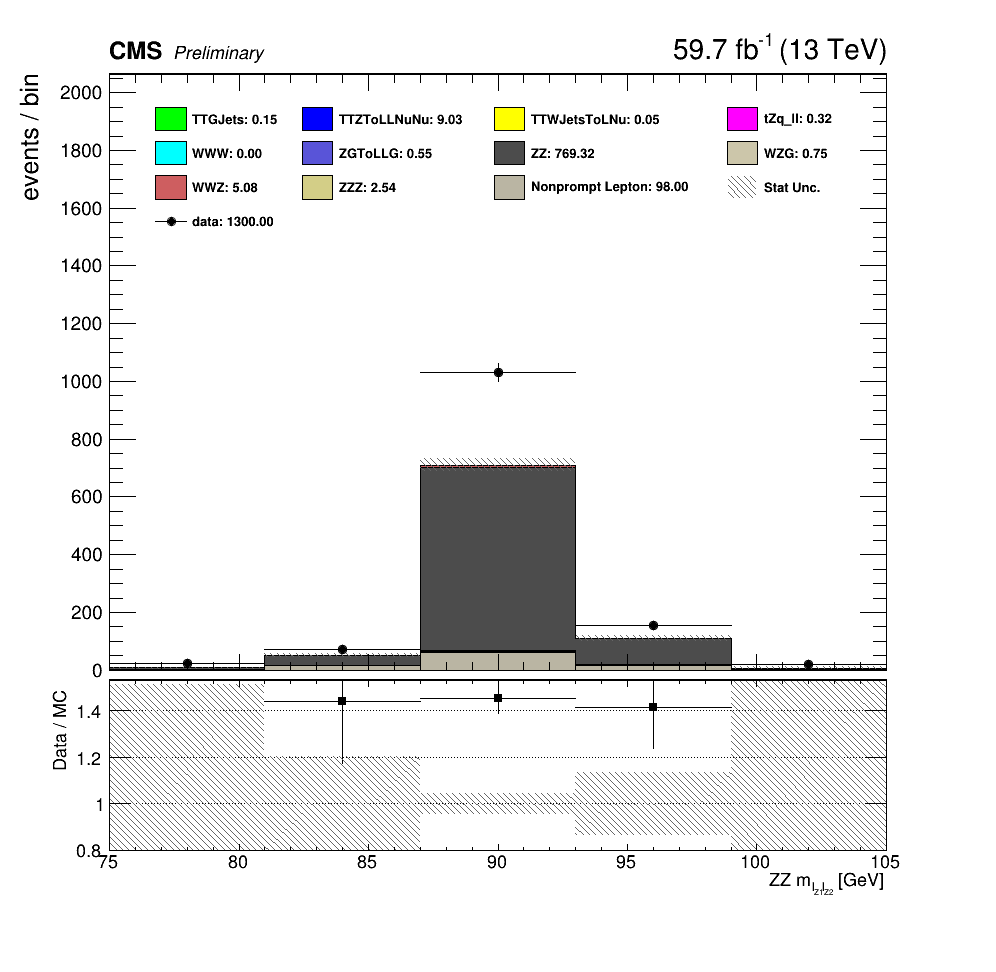

In [18]:
plot_branch = "ZZ_mllz1"

c1 = ROOT.TCanvas("","",1000,1000)

# MC Error desing
MC_err = ROOT.TH1D("","",branch[plot_branch]["xbins"],branch[plot_branch]["xleft"],branch[plot_branch]["xright"])
MC_err.Sumw2()
MC_err.SetFillColor(ROOT.kGray+2)
MC_err.SetFillStyle(3345)
MC_err.SetMarkerSize(0.)
MC_err.SetMarkerColor(ROOT.kGray+2)
MC_err.SetLineWidth(2)
MC_err.SetLineColor(0)
MC_err.SetStats(0)

# Stack
stack_mc = ROOT.THStack("","")
MC_err.Add(hist_FakeLep[plot_branch])
stack_mc.Add(hist_FakeLep[plot_branch])

# fill hist
for file in filelist_MC:
    stack_mc.Add(filelist_MC[file]["hist"][plot_branch])
    MC_err.Add(filelist_MC[file]["hist"][plot_branch])


# Legend design
legend = ROOT.TLegend(0.15, 0.65, 0.85, 0.85)
legend.SetNColumns(4)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.02)
legend.SetLineWidth(1)
legend.SetLineStyle(0)

# Legend fill
for file in filelist_MC:
    legend.AddEntry(filelist_MC[file]["hist"][plot_branch], f'{filelist_MC[file]["name"]}: {format(filelist_MC[file]["hist"][plot_branch].GetSumOfWeights(), ".2f")}','F')
legend.AddEntry(hist_FakeLep[plot_branch],f'Nonprompt Lepton: {format(hist_FakeLep[plot_branch].GetSumOfWeights(), ".2f")}', 'F')
legend.AddEntry(MC_err, 'Stat Unc.', 'F')
legend.AddEntry(hist_data[plot_branch], f'data: {format(hist_data[plot_branch].GetSumOfWeights(), ".2f")}')


c1.Draw()
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.015)  # joins upper and lower plot
# pad1.SetGridx()
pad1.Draw()
# Lower ratio plot is pad2
c1.cd()  # returns to main canvas before defining pad2
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.3)
pad2.SetGridy()
pad2.Draw()

# draw everything
pad1.cd()
hist_data[plot_branch].Draw("ep")
# hist_data.SetMinimum(10)
hist_data[plot_branch].SetMaximum(2*hist_data[plot_branch].GetMaximum())
hist_data[plot_branch].GetXaxis().SetLabelSize(0)
stack_mc.Draw("HIST SAME")
MC_err.Draw("e2 SAME")
hist_data[plot_branch].Draw("ep SAME")
legend.Draw("SAME")
# ROOT.gPad.SetLogy()
ROOT.gPad.RedrawAxis()

# h1.GetXaxis().SetLabelSize(0)
pad2.cd()
h3 = createRatio(hist_data[plot_branch], MC_err)
h4 = createRatio(MC_err, MC_err)
h3.Draw("ep")
# h3.GetXaxis().SetRangeUser(10,60)
h4.Draw("e2 SAME")
ROOT.gPad.RedrawAxis()

CMS_lumi(pad1, 0, 0)
# c1.SaveAs('Fake_Lepton/MT_LooseMuon_dist_MR_2018.pdf')